In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [2]:
# Load dataset
train = pd.read_csv('titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis
Starting by checking out missing data!

#### Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

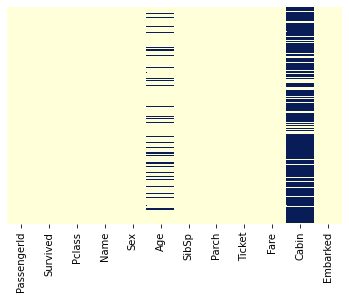

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Continuing on by visualizing some more of the data.

Text(0.5, 1.0, 'Perished vs. Survived')

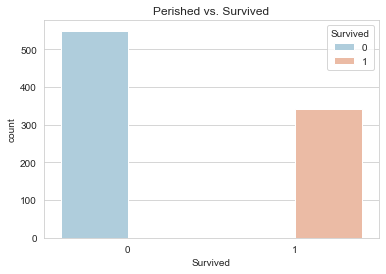

In [6]:
# Visualise Died (ie. Survived =0) vs. Survived (ie. Survived=1)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Survived',data=train,palette='RdBu_r').set_title('Perished vs. Survived')

(<Figure size 432x288 with 3 Axes>,
 {('0', 'male'): (0.0, 0.0, 0.6130961354841952, 0.8496269266379826),
  ('0', 'female'): (0.0,
   0.8529491857741952,
   0.6130961354841952,
   0.14705081422580474),
  ('1', 'male'): (0.6180712598623047,
   0.0,
   0.38192874013769545,
   0.3176546016203299),
  ('1', 'female'): (0.6180712598623047,
   0.3209768607565425,
   0.38192874013769545,
   0.6790231392434575)})

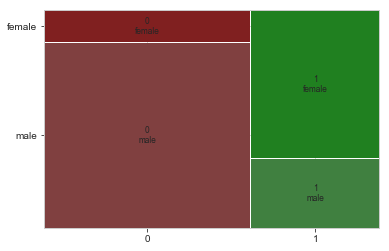

In [7]:
# Alternate model using mossaic plot from statsmodels library
mosaic(train, ['Survived', 'Sex'])

Text(0.5, 1.0, 'Survival by Gender')

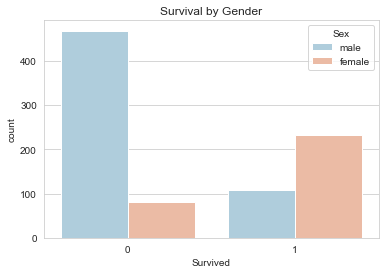

In [8]:
# Visualise survived or not genderwise
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r').set_title('Survival by Gender')

Text(0.5, 1.0, 'Survived by passenger class')

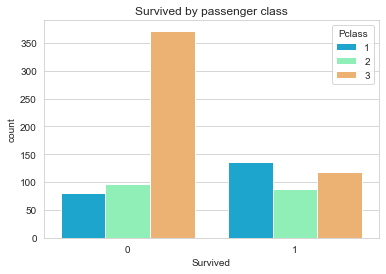

In [9]:
# Visualizing if there is difference in survival by passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow').set_title('Survived by passenger class')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution (only non null)')

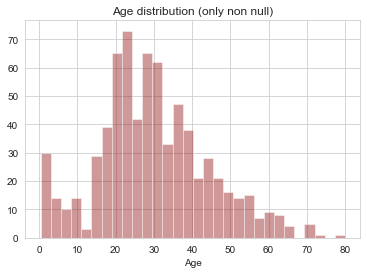

In [10]:
# Check distribution of Age of passengers ignoring null values
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30).set_title('Age distribution (only non null)')

Text(0.5, 1.0, 'Alternative visualization Age distribution (only non null)')

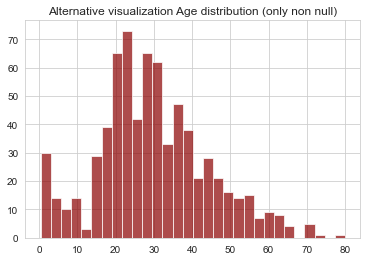

In [11]:
# Alternate distribution chart using bins & different colors (just to practice visualization)
train['Age'].hist(bins=30,color='darkred',alpha=0.7).set_title('Alternative visualization Age distribution (only non null)')

Text(0.5, 1.0, 'Number of Siblings')

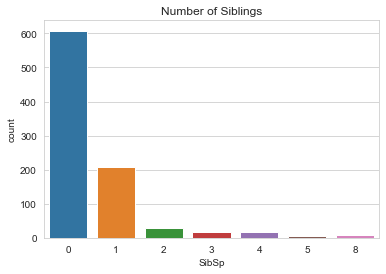

In [12]:
# Visualise by number of siblings
sns.countplot(x='SibSp',data=train).set_title('Number of Siblings')

Text(0.5, 1.0, 'Distribution of Fare paid')

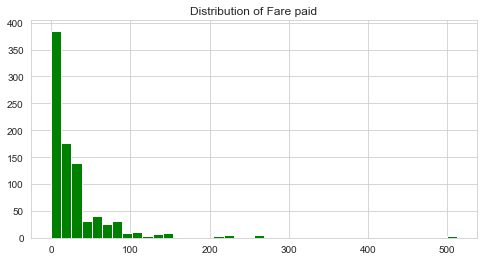

In [53]:
# Visualise by fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4)).set_title('Distribution of Fare paid')

### Data Cleaning 

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

Text(0.5, 1.0, 'Average Age of each Passenger Class')

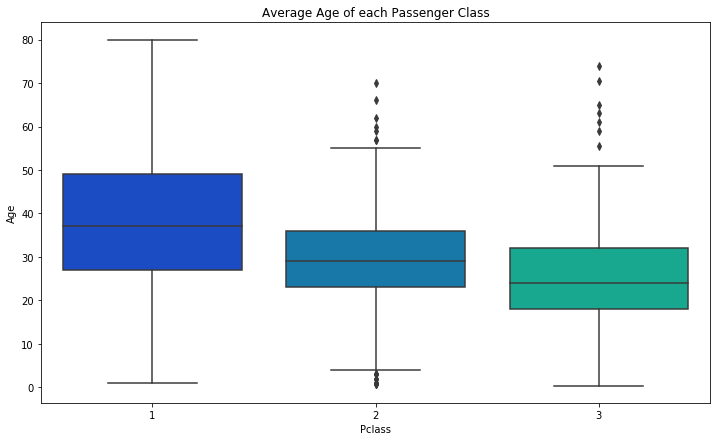

In [12]:
# Visualise average age of different passenger classes so we can replace missing age by average for passenger class
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter').set_title('Average Age of each Passenger Class')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. So Pclass 1 has average age 37, for Pclass 2 is 29 and Pclass 3 is 24. We'll use these average age values to impute based on Pclass for Age.

In [13]:
# Define function to locate where Age is null for each passenger class
# Replace all null by Average Age for that Passenger Class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
# Impute missing age by Pclass for the data by calling above function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

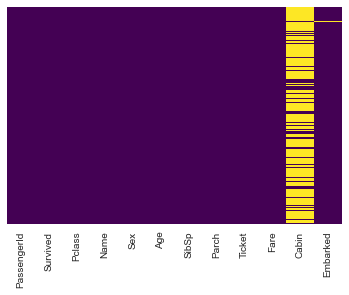

In [15]:
# Now let's use heat map again to check if all Age data has been imputed!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
# Drop the Cabin column due to too many missing values
train.drop('Cabin',axis=1,inplace=True)

In [17]:
# Check for clean data (Cabin, Age imputed by pclass & Embarked NaN rows removed)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### : Handling missing data

* dropna is type boolean, and used to indicate you do not want to include columns whose entries are all NaN (default: True)
* fill_value is type scalar, and used to choose a value to replace missing values (default: None).

We don’t have any columns where all entries are NaN, but if it were, it will be dropped by default according to dropna definition.

In [60]:
# Drop rows with NaN (Embarked has NaN values)
train.dropna(inplace=True)

### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

#### Use the pd.get_dummies method of one hot encoding and drop first column
** for more ways to create dummy variables refer to https://www.ritchieng.com/pandas-creating-dummy-variables/

In [62]:
# Analyse Data Types before converting Categorical into dummy variables
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [63]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [64]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [65]:
train = pd.concat([train,sex,embark],axis=1)

In [66]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


An interesting relation (from knowledge of the data) is Age & Squareroot of Fare. Let us plot to visualise the same. Scatterplot of Age and sqrtFare with point size = 300 and the color determined by Survival (black is died & pink for survived).

In [77]:
train['sqrtFare']=np.sqrt((train['Fare']))
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,sqrtFare
0,1,0,3,22.0,1,0,7.2500,1,0,1,2.692582
1,2,1,1,38.0,1,0,71.2833,0,0,0,8.442944
2,3,1,3,26.0,0,0,7.9250,0,0,1,2.815138
3,4,1,1,35.0,1,0,53.1000,0,0,1,7.286975
4,5,0,3,35.0,0,0,8.0500,1,0,1,2.837252


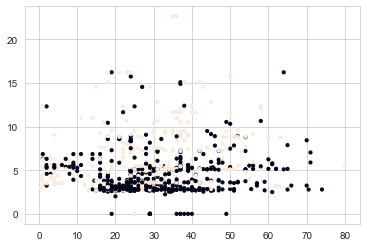

In [78]:
plt.scatter(train.Age, train.sqrtFare
, s=10, c=train.Survived)